# Black-Scholes Option Pricing Demo

This notebook demonstrates how to use the `options_pricing.black_scholes` module to compute **European call and put option prices** using the Black-Scholes formula.



## Import Libraries

We first import `numpy` and `matplotlib` for numerical computations and visualization, 
and the `black_scholes_price` function from our package.


In [37]:
import sys, numpy as np, matplotlib.pyplot as plt
import sys
import os


# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)

from options_pricing.black_scholes import black_scholes_price


##  Define Option Parameters


- $S$: current spot price of the underlying asset  
- $K$: strike price  
- $r$: risk-free interest rate  
- $T$: time to maturity (in years)  
- $\sigma$: volatility

In [38]:
S = 100       # Spot price
K = 100       # Strike price
T = 1.0       # Time to maturity (years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility


In [39]:

call = black_scholes_price(S,K,T,r,sigma,'call')
put  = black_scholes_price(S,K,T,r,sigma,'put')
call, put

(np.float64(10.450583572185565), np.float64(5.573526022256971))

### Put–Call Parity

**Put–call parity** is a fundamental relationship between the prices of European call and put options with the same strike price $K$ and maturity $T$.  
It ensures there are no arbitrage opportunities between holding calls, puts, the underlying, and bonds.

The parity states:

$$
C - P = S - K e^{-rT}
$$

where:
- $C$: price of a European call option  
- $P$: price of a European put option  


In [40]:
lhs = call - put
rhs = S - K*np.exp(-r*T)
abs(lhs-rhs)

np.float64(0.0)

## Visualize Option Price vs Spot Price

We plot how the option prices change as the underlying spot price varies. 
The vertical dashed line shows the strike price `K`.


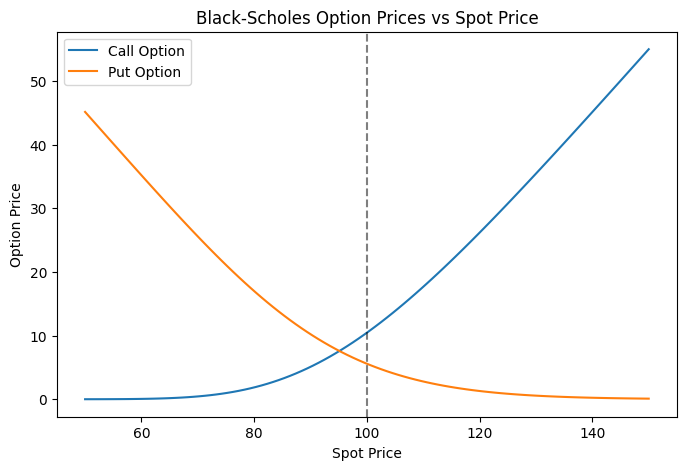

In [41]:
spot_prices = np.linspace(50, 150, 100)
call_prices = np.array([black_scholes_price(S, K, T, r, sigma, "call") for S in spot_prices])
put_prices  = np.array([black_scholes_price(S, K, T, r, sigma, "put")  for S in spot_prices])
plt.figure(figsize=(8,5))
plt.plot(spot_prices, call_prices, label='Call Option')
plt.plot(spot_prices, put_prices, label='Put Option')
plt.axvline(K, color='k', linestyle='--', alpha=0.5)
plt.title("Black-Scholes Option Prices vs Spot Price")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.legend()
plt.show()


## Sensitivity: Volatility sweeps

Higher volatility (σ) raises option value since it increases the probability of finishing in-the-money.

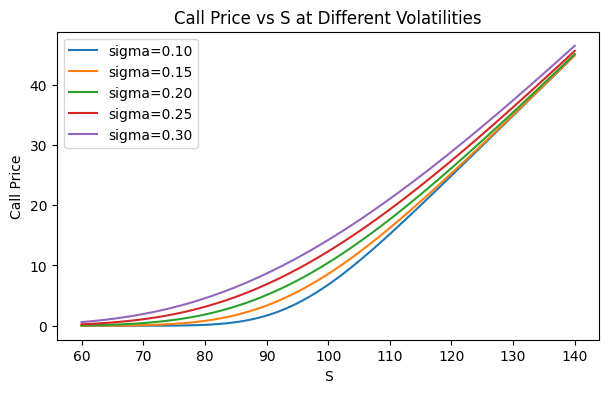

In [42]:
# Heatmap-like line grid: Price over S for multiple volatilities
S_grid = np.linspace(60, 140, 81)
sigmas = [0.10, 0.15, 0.20, 0.25, 0.30]
plt.figure(figsize=(7,4))
for sig in sigmas:
    curve = [black_scholes_price(s, K, T, r, sig, 'call') for s in S_grid]
    plt.plot(S_grid, curve, label=f'sigma={sig:.2f}')
plt.title('Call Price vs S at Different Volatilities')
plt.xlabel('S'); plt.ylabel('Call Price'); plt.legend(); plt.show()

## Call & Put Prices vs log-moneyness: $m=\ln(S/K)$
  - Out-of-the-Money (**OTM**), At-the-Money (**ATM**), In-the-Money (**ITM**)
  - $m=0$      (ATM).  
  - For $m>0$ (ITM calls / OTM puts), calls rise roughly linearly with $S$ while puts decay toward 0.  
  - For $m<0$ (OTM calls / ITM puts), puts rise while calls approach 0.  

This side-by-side view normalizes by strike and makes it easy to compare calls and puts across the same parameters.


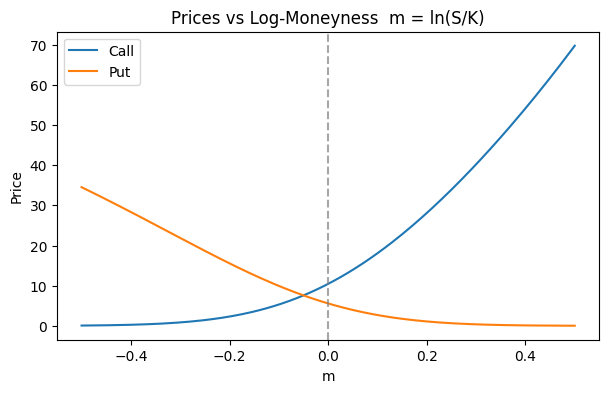

In [43]:

m_grid = np.linspace(-0.5, 0.5, 201)
S_from_m = K * np.exp(m_grid)

call_m = [black_scholes_price(S, K, T, r, sigma, "call") for S in S_from_m]
put_m  = [black_scholes_price(S, K, T, r, sigma, "put")  for S in S_from_m]

plt.figure(figsize=(7,4))
plt.plot(m_grid, call_m, label="Call")
plt.plot(m_grid, put_m,  label="Put")
plt.axvline(0.0, ls="--", color="gray", alpha=0.7)   # m = 0 is ATM
plt.title("Prices vs Log-Moneyness  m = ln(S/K)")
plt.xlabel("m")
plt.ylabel("Price")
plt.legend()
plt.show()


## Residual vs Log-Moneyness $m = \ln(S/K)$

The same residual is plotted on a log-moneyness axis.  
At $m=0$ (ATM), as well as deep ITM/OTM regions, the parity holds—again the line should be flat around zero up to numerical error.  
This confirms the numerical implementation respects put–call parity. 

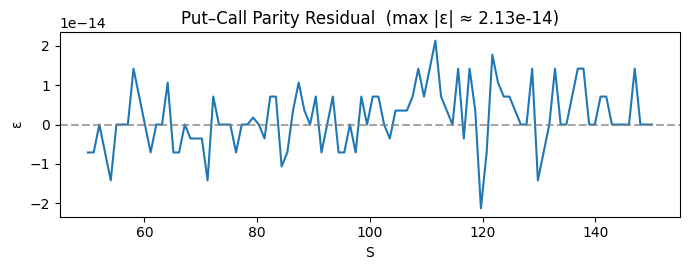

In [44]:

residual = call_prices - put_prices - (spot_prices - K*np.exp(-r*T))
max_abs = float(np.max(np.abs(residual)))

plt.figure(figsize=(7,2.8))  # tiny panel
plt.plot(spot_prices, residual)
plt.axhline(0.0, ls="--", color="gray", alpha=0.7)
plt.title(f"Put–Call Parity Residual  (max |ε| ≈ {max_abs:.2e})")
plt.xlabel("S"); plt.ylabel("ε")
plt.tight_layout()
plt.show()
